In [1]:
!pip install pandas openpyxl
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# 1. Descriptive Statistics for Block Design Scores #

In [2]:
import pandas as pd
file_name = "Assessments.xlsx"

data = pd.read_excel(file_name, sheet_name="Sheet0")
statistics = data["Block Design Score"].describe()
print("Descriptive Statistics for Block Design Scores:")
print(statistics)

Descriptive Statistics for Block Design Scores:
count    13.000000
mean     39.307692
std      12.324668
min      24.000000
25%      30.000000
50%      36.000000
75%      48.000000
max      63.000000
Name: Block Design Score, dtype: float64


In [3]:
import os
import pandas as pd

csv_files = [file for file in os.listdir() if file.endswith(".csv")]

if not csv_files:
    print(" No CSV files found in the current directory!")
else:
    for file_name in csv_files:
        try:
            df = pd.read_csv(file_name)
            print(f"\n Successfully loaded: {file_name}")
            print(df.head())
            
        except Exception as e:
            print(f" Error reading {file_name}: {e}")


 Successfully loaded: C008_SimpleStew_CompletedStepsData.csv
   Session Time Completed Step
0     49.320362     Pour Broth
1     88.827782       Add Beef
2     91.632935       Add Beef
3     94.688255       Add Beef
4     98.191216       Add Beef

 Successfully loaded: C008_SimpleStew_MovementData.csv
   Times  Chest Tracker_LOCATION_X  Chest Tracker_LOCATION_Y  \
0    0.4                 -26.89227                      -0.0   
1    0.4                 -26.89227                      -0.0   
2    0.4                 -26.89227                      -0.0   
3    0.4                 -26.89227                      -0.0   
4    0.4                 -26.89227                      -0.0   

   Chest Tracker_LOCATION_Z  _ROTATION_W  _ROTATION_X  _ROTATION_Y  \
0                 17.095029          1.0          0.0          0.0   
1                 17.095029          1.0          0.0          0.0   
2                 17.095029          1.0          0.0          0.0   
3                 17.095029    


 Successfully loaded: C017_SimpleStew_CompletedStepsData.csv
   Session Time Completed Step
0    146.096603     Pour Broth
1    178.255646       Add Beef
2    193.464767       Add Beef
3    195.537949       Add Beef
4    197.150955       Add Beef

 Successfully loaded: C017_SimpleStew_MovementData.csv
   Times  Chest Tracker_LOCATION_X  Chest Tracker_LOCATION_Y  \
0    0.4                 -26.89227                      -0.0   
1    0.4                 -26.89227                      -0.0   
2    0.4                 -26.89227                      -0.0   
3    0.4                 -26.89227                      -0.0   
4    0.4                 -26.89227                      -0.0   

   Chest Tracker_LOCATION_Z  _ROTATION_W  _ROTATION_X  _ROTATION_Y  \
0                 17.095029          1.0          0.0          0.0   
1                 17.095029          1.0          0.0          0.0   
2                 17.095029          1.0          0.0          0.0   
3                 17.095029    


 Successfully loaded: C032_SimpleStew_MovementData.csv
      Times  Chest Tracker_LOCATION_X  Chest Tracker_LOCATION_Y  \
0  0.272269                 -26.89227                      -0.0   
1  0.272269                 -26.89227                      -0.0   
2  0.272269                 -26.89227                      -0.0   
3  0.272269                 -26.89227                      -0.0   
4  0.272269                 -26.89227                      -0.0   

   Chest Tracker_LOCATION_Z  _ROTATION_W  _ROTATION_X  _ROTATION_Y  \
0                 17.095029          1.0          0.0          0.0   
1                 17.095029          1.0          0.0          0.0   
2                 17.095029          1.0          0.0          0.0   
3                 17.095029          1.0          0.0          0.0   
4                 17.095029          1.0          0.0          0.0   

   _ROTATION_Z  LeftShoulder Tracker_LOCATION_X  \
0          0.0                        -26.89227   
1          0.0    

# 2. Total Recipe Completion Time for each participant

In [4]:
import os
import pandas as pd

working_dir = os.getcwd()

def get_completion_time(csv_path):
    df = pd.read_csv(csv_path)

    for col in ["Session Time", "Times"]:
        if col in df.columns:
            return df[col].max()  
    
    return None  

completion_times = {}
for file in os.listdir(working_dir):
    if "CompletedStepsData" in file and file.endswith(".csv"):
        participant_id = file.split("_")[0] 
        file_path = os.path.join(working_dir, file)
        time = get_completion_time(file_path)
        if time is not None:
            completion_times[participant_id] = time

df_results = pd.DataFrame(completion_times.items(), columns=["Participant ID", "Completion Time"])
print("\nTotal Recipe Completion Time:")
print(df_results.to_string(index=False))


Total Recipe Completion Time:
Participant ID  Completion Time
          C008       352.999298
          C009       452.493500
          C013       451.592560
          C016       198.272446
          C017       403.606689
          C021       580.019897
          C024       200.094406
          C025       430.629974
          C032       251.382736
          C033       476.875946
          C037       542.508423
          C040       261.565430
          C041       324.162415


# 3. Spearman Correlation Analysis for Block design score vs Total completion time

In [5]:
import os
import pandas as pd
import scipy.stats as stats

directory_path = os.getcwd()
assessments = pd.read_excel(os.path.join(directory_path, "Assessments.xlsx"), sheet_name="Sheet0")
assessments.columns = assessments.columns.str.strip()
assessments.rename(columns={"TOPF\nSubject ID": "Participant_ID", "Block Design Score": "Block_Design_Score"}, inplace=True)

completion_times = {}
for file in os.listdir(directory_path):
    if "CompletedStepsData" in file and file.endswith(".csv"):
        df = pd.read_csv(os.path.join(directory_path, file))
        completion_times[file.split("_")[0]] = df.get("Session Time", df.get("Times")).max()

df_results = pd.DataFrame(completion_times.items(), columns=["Participant_ID", "Total_Completion_Time"])
merged_df = pd.merge(assessments, df_results, on="Participant_ID", how="inner")

Correlation_coefficient, p_value = stats.spearmanr(merged_df["Block_Design_Score"], merged_df["Total_Completion_Time"])

print("Spearman Correlation Analysis Results:")
print(f"Spearman Correlation Coefficient: {Correlation_coefficient:.4f}")
print(f"P-Value: {p_value:.4f}")


Spearman Correlation Analysis Results:
Spearman Correlation Coefficient: -0.3967
P-Value: 0.1796


# 4. Scatter plot

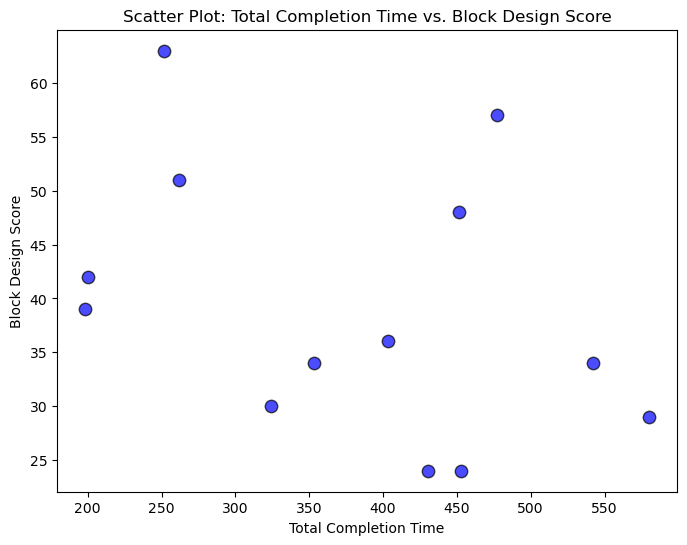

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(merged_df["Total_Completion_Time"], merged_df["Block_Design_Score"], color='blue', alpha=0.7, edgecolors='black', s=80)

plt.xlabel("Total Completion Time")  
plt.ylabel("Block Design Score") 
plt.title("Scatter Plot: Total Completion Time vs. Block Design Score")
plt.show()

# 5. Linear Regression (Linear fit)

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression

merged_df[["Block_Design_Score", "Total_Completion_Time"]] = merged_df[["Block_Design_Score", "Total_Completion_Time"]].apply(pd.to_numeric, errors="coerce")

merged_df = merged_df.dropna(subset=["Block_Design_Score", "Total_Completion_Time"])

X = merged_df[["Block_Design_Score"]]
y = merged_df["Total_Completion_Time"]
model = LinearRegression().fit(X, y)

slope = model.coef_[0]  
intercept = model.intercept_

print("\nLinear Regression Results:")
print(f"Slope (m): {slope:.2f}")
print(f"Intercept (b): {intercept:.2f}")


Linear Regression Results:
Slope (m): -3.70
Intercept (b): 524.46


# 6. Scatter plot with Linear line

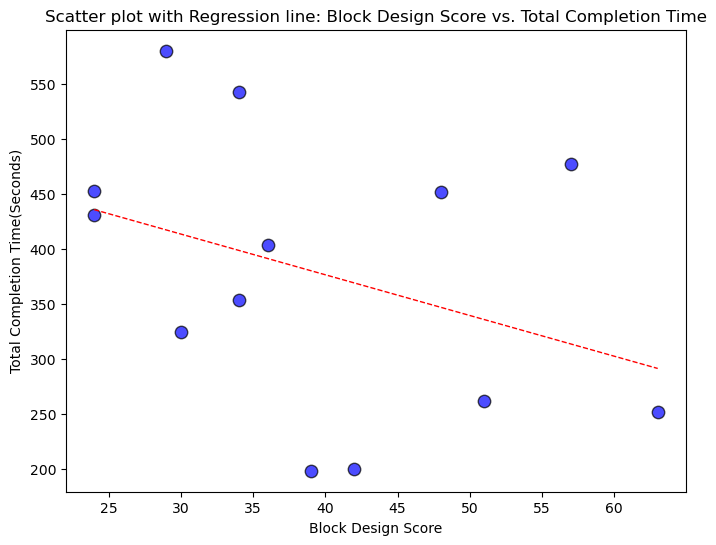

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.linspace(merged_df["Block_Design_Score"].min(), merged_df["Block_Design_Score"].max(), 100)
y_values = slope * x_values + intercept

plt.figure(figsize=(8, 6))
plt.scatter(merged_df["Block_Design_Score"], merged_df["Total_Completion_Time"], color='blue', alpha=0.7, edgecolors="black", s=80)

plt.plot(x_values, y_values, color='red', linestyle='dashed', linewidth=1)

plt.xlabel("Block Design Score")
plt.ylabel("Total Completion Time(Seconds)")
plt.title("Scatter plot with Regression line: Block Design Score vs. Total Completion Time")

plt.show()

# 8. Quantitative measure: Task efficiency score

In [9]:
import pandas as pd

merged_df["Task_Efficiency_Score"] = (merged_df["Block_Design_Score"] / merged_df["Total_Completion_Time"]) * 100

print("Task Efficiency Score (TES) computed successfully:")
print(merged_df[["Participant_ID", "Block_Design_Score", "Total_Completion_Time", "Task_Efficiency_Score"]].head())

Task Efficiency Score (TES) computed successfully:
  Participant_ID  Block_Design_Score  Total_Completion_Time  \
0           C008                  34             352.999298   
1           C009                  24             452.493500   
2           C013                  48             451.592560   
3           C016                  39             198.272446   
4           C017                  36             403.606689   

   Task_Efficiency_Score  
0               9.631747  
1               5.303944  
2              10.629050  
3              19.669904  
4               8.919575  


# 9. Spearman correlation analysis with the quantitative measure


Spearman Correlation Analysis Results:
Spearman Correlation Coefficient: 0.8595
P-Value: 0.0002


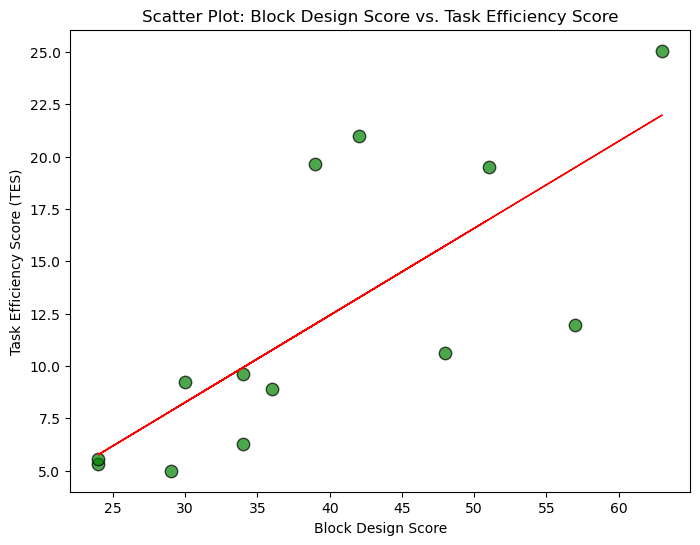

In [10]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

correlation_coefficient, p_value = stats.spearmanr(merged_df["Task_Efficiency_Score"], merged_df["Block_Design_Score"])


print("\nSpearman Correlation Analysis Results:")
print(f"Spearman Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-Value: {p_value:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(merged_df["Block_Design_Score"], merged_df["Task_Efficiency_Score"], color='green', alpha=0.7, edgecolors="black", s=80)

slope, intercept = np.polyfit(merged_df["Block_Design_Score"], merged_df["Task_Efficiency_Score"], 1)
fitted_values = merged_df["Block_Design_Score"] * slope + intercept
plt.plot(merged_df["Block_Design_Score"], fitted_values, color='red', linewidth=1)

plt.xlabel("Block Design Score")
plt.ylabel("Task Efficiency Score (TES)")
plt.title("Scatter Plot: Block Design Score vs. Task Efficiency Score")

plt.show()